In [20]:
import gensim
import numpy
import matplotlib.pyplot

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

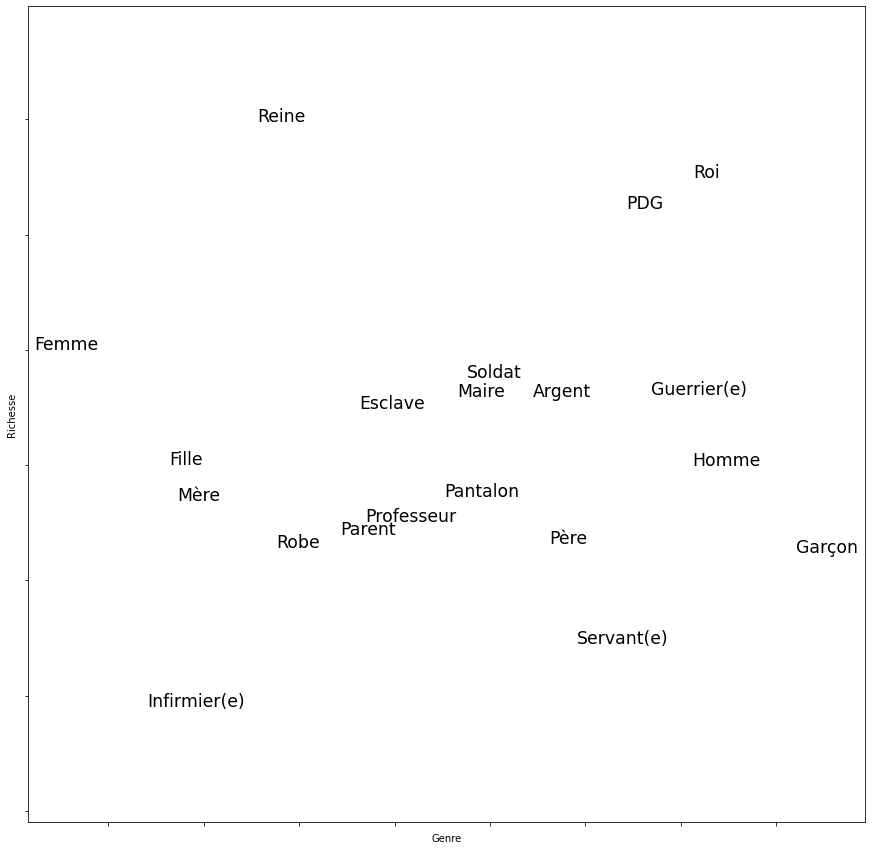

In [75]:
vect_x = model["man"] - model["woman"]
vect_x = vect_x / numpy.linalg.norm(vect_x)

vect_y = model["rich"] - model["poor"]
vect_y = vect_y / numpy.linalg.norm(vect_y)

words = {
    "man": "Homme",
    "woman": "Femme",
    "mayor": "Maire",
    "nurse": "Infirmier(e)",
    "warrior": "Guerrier(e)",
    "soldier": "Soldat",
    "king": "Roi",
    "queen": "Reine",
    "teacher": "Professeur",
    "parent": "Parent",
    "ceo": "PDG",
    "slave": "Esclave",
    "dress": "Robe",
    "trousers": "Pantalon",
    "father": "Père",
    "mother": "Mère",
    "money": "Argent",
    # "thief": "Voleur",
    "servant": "Servant(e)",
    "guy": "Garçon",
    "girl": "Fille",
}

figure = matplotlib.pyplot.figure(figsize=(15, 15))


xs = list()
ys = list()

for word in words:
    x = vect_x.dot(model[word])
    y = vect_y.dot(model[word])
    matplotlib.pyplot.text(x, y, words[word], horizontalalignment="center", fontsize="xx-large")
    xs.append(x)
    ys.append(y)

matplotlib.pyplot.xlim(min(xs) - .1, max(xs) + .1)
matplotlib.pyplot.ylim(min(ys) - .1, max(ys) + .1)

figure.axes[0].get_xaxis().set_ticklabels([])
figure.axes[0].get_yaxis().set_ticklabels([])

matplotlib.pyplot.xlabel("Genre")
matplotlib.pyplot.ylabel("Richesse")

matplotlib.pyplot.savefig("word2vec.jpg")